In [2]:
import pandas as pd

In [3]:
area = pd.Series({
    "CN": 9.6, "RU": 17, "US": 9.8
})

In [4]:
population = pd.Series({
    "CN": 1386, "RU": 144, "US": 327
})

In [5]:
area

CN     9.6
RU    17.0
US     9.8
dtype: float64

In [6]:
area["CN"]

9.6

In [7]:
countries = pd.DataFrame(
    {"area": area, "population": population}
)

In [8]:
countries

,area,population
CN,9.6,1386
RU,17.0,144
US,9.8,327


# importing / exporting data

In [9]:
euribor = pd.read_csv(
    "https://datahub.io/core/euribor/r/euribor-12m-monthly.csv",
    names=["Datum", "Rate", "Laufzeit", "Intervall"],
    index_col="Datum",
    header=0,
    usecols=["Datum", "Rate"],
    parse_dates=["Datum"],
    dtype={ "Rate": "float32" }
)

In [10]:
euribor

,Rate
Datum,
1999-01-01,3.213
1999-02-01,2.998
1999-03-01,3.079
1999-04-01,2.939
1999-05-03,2.680
...,...
2016-12-01,-0.079
2017-01-02,-0.083
2017-02-01,-0.103


In [11]:
sp500 = pd.read_csv(
    "https://datahub.io/core/s-and-p-500/r/data.csv",
    index_col="Date",
    parse_dates=["Date"],
)

In [12]:
exchange_rates = pd.read_csv(
    "https://datahub.io/core/us-euro-foreign-exchange-rate/r/monthly.csv",
    parse_dates=["Date"],
)

In [13]:
iris = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
    header=None,
    names=["sepal_length", "sepal_width",
           "petal_length", "petal_width", "species"]
)

In [14]:
titanic = pd.read_csv(
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv",
    index_col="PassengerId",
)

In [15]:
sp500.to_csv("sp500.csv")

In [16]:
sp500.to_excel("sp500.xlsx")

In [17]:
titanic["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
titanic["Age"].count()

714

In [19]:
titanic["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [20]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [22]:
iris["sepal_length"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [23]:
iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

## querying data

In [24]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [25]:
sp500.index

DatetimeIndex(['1871-01-01', '1871-02-01', '1871-03-01', '1871-04-01',
               '1871-05-01', '1871-06-01', '1871-07-01', '1871-08-01',
               '1871-09-01', '1871-10-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Date', length=1768, freq=None)

In [26]:
titanic["Age"]

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [27]:
titanic.Age

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [28]:
sp500.loc["1872-01-01" : "1872-12-31"]

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1872-01-01,4.86,0.26,0.40,12.65,5.36,95.95,5.20,7.95,NaN
1872-02-01,4.88,0.27,0.41,12.65,5.38,96.35,5.27,8.00,NaN
1872-03-01,5.04,0.27,0.41,12.84,5.40,98.03,5.25,7.93,NaN
1872-04-01,5.18,0.27,0.41,13.13,5.42,98.56,5.20,7.80,NaN
1872-05-01,5.18,0.28,0.41,13.13,5.43,98.56,5.26,7.85,NaN
1872-06-01,5.13,0.28,0.41,13.03,5.45,98.32,5.37,7.95,NaN
1872-07-01,5.10,0.28,0.42,12.84,5.47,99.20,5.51,8.12,NaN
1872-08-01,5.04,0.29,0.42,12.94,5.49,97.31,5.54,8.11,NaN
1872-09-01,4.95,0.29,0.42,13.03,5.51,94.87,5.56,8.10,NaN


In [29]:
sp500.iloc[0:10]

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN
1871-06-01,4.82,0.26,0.4,12.08,5.34,99.66,5.38,8.27,NaN
1871-07-01,4.73,0.26,0.4,12.08,5.34,97.80,5.38,8.27,NaN
1871-08-01,4.79,0.26,0.4,11.89,5.34,100.62,5.46,8.40,NaN
1871-09-01,4.84,0.26,0.4,12.18,5.35,99.29,5.33,8.21,NaN


In [30]:
titanic[ titanic["Pclass"] == 1 ]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [31]:
titanic[ titanic["Age"] >= 70 ]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [32]:
sp500.sample()

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1947-07-01,15.77,0.77,1.48,22.2,2.34,177.47,8.67,16.62,11.7


In [33]:
sp500.sample(10)

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1998-05-01,1108.42,15.85,39.16,162.80,5.65,1701.00,24.32,60.10,36.96
1888-07-01,5.14,0.24,0.30,8.09,3.56,158.78,7.36,9.32,15.28
1922-02-01,7.46,0.47,0.36,16.90,4.30,110.28,6.92,5.27,6.46
1884-06-01,4.46,0.32,0.35,8.85,3.58,125.93,9.04,10.02,12.91
1900-09-01,5.80,0.28,0.48,7.80,3.12,185.73,8.89,15.37,17.34
1997-07-01,925.29,15.22,40.58,160.50,6.22,1440.31,23.69,63.17,32.77
2004-02-01,1143.36,17.81,50.91,186.20,4.08,1534.11,23.90,68.31,27.65
1942-04-01,7.84,0.68,1.02,16.10,2.46,121.66,10.55,15.83,8.54
1951-03-01,21.63,1.52,2.83,25.80,2.59,209.46,14.72,27.40,11.84


In [34]:
sp500.sample(frac=0.01)

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1883-04-01,5.87,0.32,0.42,9.90,3.63,148.21,8.16,10.60,15.48
1972-11-01,115.10,3.13,6.33,42.40,6.28,678.21,18.42,37.28,18.34
1948-10-01,16.19,0.89,2.14,24.40,2.34,165.77,9.11,21.95,10.83
1988-08-01,263.70,9.38,22.38,119.00,9.26,553.63,19.70,46.98,14.24
1952-11-01,25.03,1.42,2.39,26.70,2.81,234.21,13.32,22.33,12.47
1896-07-01,4.04,0.18,0.23,6.28,3.50,160.73,7.33,9.02,16.64
1896-03-01,4.38,0.19,0.24,6.57,3.57,166.68,7.14,9.13,17.23
2007-02-01,1444.80,25.29,82.60,203.50,4.72,1773.78,31.04,101.41,27.32
1906-03-01,9.56,0.35,0.69,8.47,3.47,282.06,10.25,20.43,19.26


In [35]:
# exercises: sp500

# first entry
print( sp500.iloc[0] )
# last entry
print( sp500.iloc[-1] )
# last 10 entries
print( sp500.iloc[-10:] )
# 10 random entries
print( sp500.sample(10) )
# entry from 2009-01-01
print( sp500.loc["2009-01-01"] )
# entries from the year 2009
print( sp500.loc["2009"] )

SP500                    4.44
Dividend                 0.26
Earnings                 0.40
Consumer Price Index    12.46
Long Interest Rate       5.32
Real Price              89.00
Real Dividend            5.21
Real Earnings            8.02
PE10                      NaN
Name: 1871-01-01 00:00:00, dtype: float64
SP500                   2642.19
Dividend                    NaN
Earnings                    NaN
Consumer Price Index     249.84
Long Interest Rate         2.80
Real Price              2642.19
Real Dividend               NaN
Real Earnings               NaN
PE10                      31.19
Name: 2018-04-01 00:00:00, dtype: float64
              SP500  Dividend  Earnings  Consumer Price Index  \
Date                                                            
2017-07-01  2454.10     47.54    105.04                244.79   
2017-08-01  2456.22     47.85    106.06                245.52   
2017-09-01  2492.84     48.17    107.08                246.82   
2017-10-01  2557.00     48.42    

In [36]:
# entries from the year 2009
print( sp500.loc["2009"] )
# print( sp500.loc["2009-01-01" : "2009-12-31"])

              SP500  Dividend  Earnings  Consumer Price Index  \
Date                                                            
2009-01-01   865.58     28.01     12.21                211.14   
2009-02-01   805.23     27.64      9.53                212.19   
2009-03-01   757.13     27.26      6.86                212.71   
2009-04-01   848.15     26.70      7.08                213.24   
2009-05-01   902.41     26.15      7.29                213.86   
2009-06-01   926.12     25.59      7.51                215.69   
2009-07-01   935.82     25.03      9.19                215.35   
2009-08-01  1009.73     24.46     10.86                215.83   
2009-09-01  1044.55     23.90     12.54                215.97   
2009-10-01  1067.66     23.40     25.35                216.18   
2009-11-01  1088.07     22.91     38.16                216.33   
2009-12-01  1110.38     22.41     50.97                215.95   

            Long Interest Rate  Real Price  Real Dividend  Real Earnings  \
Date         

In [37]:
# entries with Long Interest Rate > 14

print( sp500[sp500["Long Interest Rate"] > 14] )

            SP500  Dividend  Earnings  Consumer Price Index  \
Date                                                          
1981-05-01  131.7      6.35     14.87                  89.8   
1981-07-01  129.1      6.43     15.10                  91.6   
1981-08-01  129.6      6.48     15.18                  92.3   
1981-09-01  118.3      6.52     15.27                  93.2   
1981-10-01  119.8      6.56     15.30                  93.4   
1982-01-01  117.3      6.66     15.18                  94.3   
1982-02-01  114.5      6.69     14.99                  94.6   
1982-06-01  109.7      6.81     14.17                  97.0   

            Long Interest Rate  Real Price  Real Dividend  Real Earnings  PE10  
Date                                                                            
1981-05-01               14.10      366.41          17.68          41.36  8.82  
1981-07-01               14.28      352.12          17.55          41.18  8.45  
1981-08-01               14.94      350.80   

In [38]:
sp500.iloc[0:1]

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1871-01-01,4.44,0.26,0.4,12.46,5.32,89.0,5.21,8.02,NaN


In [39]:
sp500.iloc[0]

SP500                    4.44
Dividend                 0.26
Earnings                 0.40
Consumer Price Index    12.46
Long Interest Rate       5.32
Real Price              89.00
Real Dividend            5.21
Real Earnings            8.02
PE10                      NaN
Name: 1871-01-01 00:00:00, dtype: float64

In [40]:
# find the highest value
sp500_max = sp500["SP500"].max()
sp500_max

2789.8

In [41]:
# when did the highest value occur?
sp500[sp500["SP500"] == sp500_max]

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
2018-01-01,2789.8,49.29,NaN,247.87,2.58,2811.96,49.68,NaN,33.31


In [42]:
# titanic: percentage of survivors in the first class

titanic_first_class = titanic[titanic["Pclass"] == 1]

In [43]:
titanic_survived_first_class = titanic_first_class[titanic_first_class["Survived"] == True]

In [44]:
titanic_survived_first_class.shape[0] / titanic_first_class.shape[0]

0.6296296296296297

In [45]:
titanic_first_class.Survived.value_counts()[1]  / titanic_first_class.shape[0]

0.6296296296296297

## querying data: advanced

In [46]:
sp500.loc["1971-01-01", "Long Interest Rate"]

6.24

In [47]:
iris["sepal_length"].sort_values()

13     4.3
42     4.4
38     4.4
8      4.4
41     4.5
      ... 
122    7.7
118    7.7
117    7.7
135    7.7
131    7.9
Name: sepal_length, Length: 150, dtype: float64

In [48]:
iris.sort_index()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [49]:
iris.sort_values("sepal_length")

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
...,...,...,...,...,...
122,7.7,2.8,6.7,2.0,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica


In [50]:
titanic[titanic["Pclass"] == 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [51]:
titanic[titanic["Pclass"] >= 2]
titanic[titanic["Sex"] == "male"]

titanic[(titanic["Pclass"] >= 2) & (titanic["Sex"] == "male")];

In [52]:
titanic[(titanic["Embarked"] == "S") | (titanic["Embarked"] == "Q")];

In [53]:
titanic[titanic["Embarked"].isin(["S", "Q"])];

In [54]:
adult_males = titanic[(titanic["Age"] >= 18) & (titanic["Sex"] == "male")]
adult_males.sort_values(by="Age")

# one line:

titanic[(titanic["Age"] >= 18) & (titanic["Sex"] == "male")].sort_values("Age")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S
176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,349912,7.7750,NaN,S
386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S
506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C
...,...,...,...,...,...,...,...,...,...,...,...
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C


In [55]:
# iris.query("species == \"Iris-setosa\"")
iris.query("species == 'Iris-setosa'").sort_values("petal_length")

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
36,5.5,3.5,1.3,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## Plotting

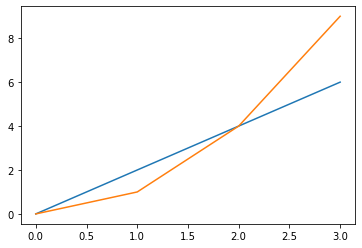

In [56]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3])

y1 = x*2
y2 = x**2

plt.plot(x, y1)
plt.plot(x, y2)

<AxesSubplot:xlabel='Datum'>

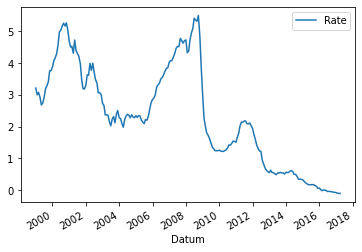

In [57]:
euribor.plot()

<AxesSubplot:>

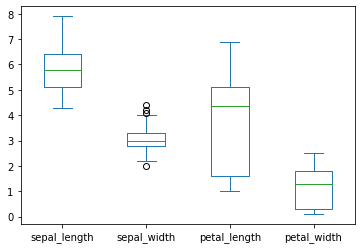

In [58]:
iris.plot.box()

In [59]:
# euribor, sp500, iris, titanic, (exchange_rates)

<AxesSubplot:xlabel='Date'>

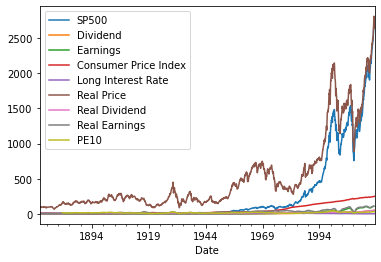

In [61]:
sp500.plot()

<AxesSubplot:xlabel='Datum'>

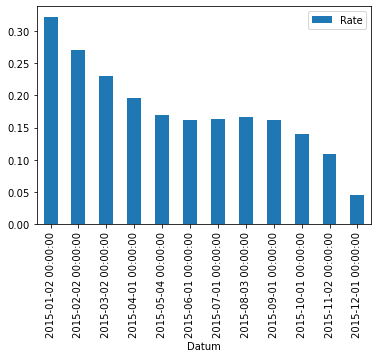

In [64]:
euribor_2015 = euribor.loc["2015"]
euribor_2015.plot.bar()

# short version:
# euribor.loc["2015"].plot.bar()

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

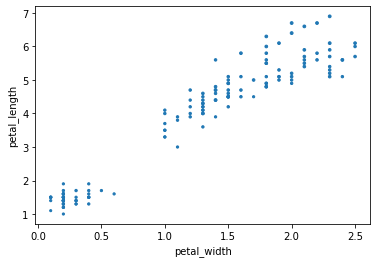

In [74]:
# scatter plot

iris.plot.scatter(x="petal_width", y="petal_length", s="sepal_length")

In [84]:
iris["species_num"] = iris["species"].replace({ "Iris-setosa": "red", "Iris-versicolor": "green", "Iris-virginica": "blue"})

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

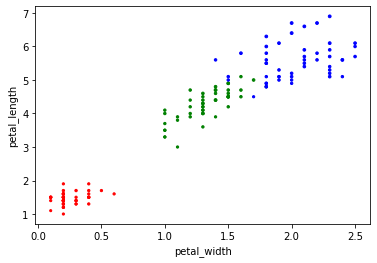

In [85]:
iris.plot.scatter(x="petal_width", y="petal_length", s="sepal_length", c="species_num")

<AxesSubplot:ylabel='Frequency'>

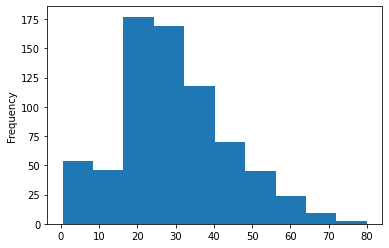

In [86]:
titanic["Age"].plot.hist()

<AxesSubplot:>

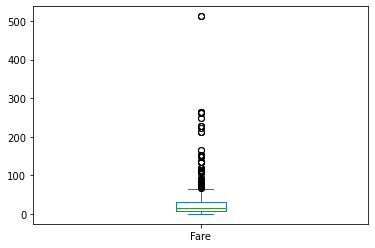

In [89]:
titanic["Fare"].plot.box()

<AxesSubplot:ylabel='Pclass'>

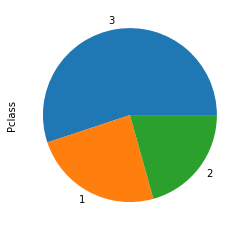

In [92]:
titanic["Pclass"].value_counts().plot.pie()